##### Análise 2 - 18/03/2021
    Base manutenção de sistemas e subsistemas

##### Importação dos módulos utilizados

In [1]:
import pandas as pd
from numpy import std, mean, var, inf, isfinite, nan
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

##### Carregamento dos dados e padronização das colunas

In [2]:
csv = 'base.csv'
df_raw = pd.read_csv(csv, sep=';', encoding='latin-1')  # latin-1 no lugar de utf-8 salvou o dia aqui (Çs, acentos, etc..)
df_raw.columns = df_raw.columns.str.lower().str.replace('\n', '')
rename = {
    'classe de manutenção - código': 'cod_classe_manutencao',
    'classe de manutenção - descrição': 'desc_classe_manutencao',
    'funcionário - código': 'cod_funcionario',
    'sistema veicular - código': 'cod_sistema',
    'sistema veicular - código.1': 'desc_sistema',
    'subsistema veicular - código': 'cod_subsistema',
    'subsistema veicular - descrição': 'desc_subsistema',
    'data de entrada': 'data_entrada',
    'data de saída': 'data_saida'
}
df_raw.rename(rename, axis=1, inplace=True)
df_raw['desc_sistema'] = df_raw['desc_sistema'].str.capitalize()
df_raw['desc_subsistema'] = df_raw['desc_subsistema'].str.capitalize()

In [3]:
df_raw.head()

,cod_classe_manutencao,desc_classe_manutencao,data_entrada,data_saida,cod_funcionario,funcionário - descrição,cod_sistema,desc_sistema,cod_subsistema,desc_subsistema,horas,%sistema veicular,%funcionário,%data de saída,%data de entrada,%classe de manutenção,% geral
0,29,Corret. Emergencial,01/04/2020,01/04/2020,22955,Marcelo Venceslau da Silva,1400,Sistema hidráulico,1402,Cilindro hidráulico,2.35,100.0,100.0,2.10,0.11,0.0,0.0
1,29,Corret. Emergencial,01/04/2020,01/04/2020,30413,Agnaldo Aparecido Monteiro,1300,Sistema elétrico,1312,Indicadores diversos,4.74,100.0,100.0,4.23,0.23,0.0,0.0
2,29,Corret. Emergencial,01/04/2020,01/04/2020,41598,Ademir de Jesus Aparecido,1400,Sistema hidráulico,1410,Mangueiras,2.99,100.0,100.0,2.67,0.15,0.0,0.0
3,29,Corret. Emergencial,01/04/2020,01/04/2020,50082,Alessandro Miranda,1000,Pneus e aros,1003,Pneus traseiros,0.29,100.0,100.0,0.26,0.01,0.0,0.0
4,29,Corret. Emergencial,01/04/2020,01/04/2020,52596,Josenaldo Silva Sousa,1300,Sistema elétrico,1301,Alternador,3.35,100.0,100.0,2.99,0.16,0.0,0.0


##### Colunas e tipos

In [4]:
df_raw.dtypes

cod_classe_manutencao        int64
desc_classe_manutencao      object
data_entrada                object
data_saida                  object
cod_funcionario              int64
funcionário - descrição     object
cod_sistema                  int64
desc_sistema                object
cod_subsistema               int64
desc_subsistema             object
horas                      float64
%sistema veicular          float64
%funcionário               float64
%data de saída             float64
%data de entrada           float64
%classe de manutenção      float64
% geral                    float64
dtype: object

##### Agrupamento por sistema

In [5]:
df_sistemas = df_raw.groupby(['desc_sistema', 'desc_subsistema'])['horas'].agg([
    sum,
    'count',
    std,
    mean,
    var
]).reset_index()
df_sistemas

,desc_sistema,desc_subsistema,sum,count,std,mean,var
0,Agregado câmbio,Eixo piloto,0.82,1,NaN,0.820000,NaN
1,Ar condicionado,Compres. ar condicionado,100.29,35,4.361800,2.865429,19.025302
2,Ar condicionado,Correia,0.46,1,NaN,0.460000,NaN
3,Ar condicionado,Filtro externo,10.38,9,2.103331,1.153333,4.424000
4,Ar condicionado,Filtro interno,11.40,46,0.514807,0.247826,0.265026
...,...,...,...,...,...,...,...
712,Sistema industrial colhedora,Sapata flutuante,10.56,5,2.989502,2.112000,8.937120
713,Sistema industrial colhedora,Sincronismo,30.02,26,0.801694,1.154615,0.642714
714,Sistema industrial colhedora,Suspensão,94.72,59,1.488297,1.605424,2.215029
715,Sistema industrial colhedora,Trem de rolos,86.43,51,1.819257,1.694706,3.309697


Text(0.5, 1.0, 'Média de horas por subsistema dentro de um sistema')

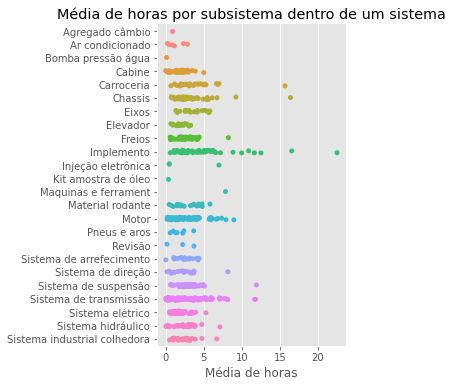

In [6]:
plt.style.use('ggplot')
# fig, ax = plt.plot()
data_gs = df_sistemas[df_sistemas['desc_sistema'] != 'Sistema de alimentação']
gs = sns.catplot(data=data_gs, x='mean', y='desc_sistema')

gs.set_xlabels('Média de horas')
gs.set_ylabels('')
plt.title('Média de horas por subsistema dentro de um sistema')

*Ignorando 'sistema de alimentação' por apresentar dados muito esparsos*

    Existe uma variação na média entre subsistemas dentro de um mesmo sistema, com a maioria dos subsistemas levando, em média, menos de 5 horas por manutenção.
    Exceções notáveis são os subsistemas de 'Implementos', 'Carroceria' e 'Chassis', com alguns deles tendo uma média superior a 15 horas de serviço.

#### Perguntas
    Dado uma manutenção de determinado tipo (emergencial, preventiva ou preditiva), qual a probabilidade dela demorar [X] horas?

##### Distribuição de horas

Agrupamento por classe de manutenção

In [7]:
df_distribuicao = df_raw[['desc_classe_manutencao', 'desc_sistema', 'horas']]
df_distribuicao.loc[df_distribuicao['desc_classe_manutencao'].isin(['Apoio', 'Preventiva Condição', 'Preventiva por Tempo']), 'desc_classe_manutencao'] = 'Preventivas'

In [8]:
def coeficiente_var(series):
    return (std(series)/mean(series))*100
df_distribuicao.groupby('desc_classe_manutencao')['horas'].agg(['describe', coeficiente_var])

describe                                            \
                          count       mean        std  min     25%    50%   
desc_classe_manutencao                                                      
Corret. Emergencial     27649.0   4.159516  16.457490  0.0  0.9100  1.920   
Preditiva                 216.0  10.444444  12.688490  0.1  3.2975  5.705   
Preventivas             23198.0   1.066978   2.346406  0.0  0.1300  0.330   

                                        coeficiente_var  
                            75%     max           horas  
desc_classe_manutencao                                   
Corret. Emergencial      3.9600  219.99      395.651601  
Preditiva               12.1925   73.46      121.203996  
Preventivas              1.0000   93.68      219.906721

    As manutenções emergenciais são a maioria, e levam, em média, 4 vezes mais horas de trabalho do que as manutenções preventivas, porém quase metade do tempo das manutenções preditivas (ué?). O desvio padão das manutenções preventivas é o mais baixo dos três tipos, indicando uma maior consistencia nos tempos de serviço, ou seja, maior previsibilidade. As emergenciais tem um desvio quase 7 vezes maior, indicando uma maior inconsistencia nas horas de serviço desta classe.

Seccionação dos dados em 'baldes' de horas

In [9]:
horas_distribuicao = pd.cut(df_distribuicao['horas'], [0, 1, 2, 3, 4, 5, 10, inf],
                            labels=['<= 1', '1-2', '2-3', '3-4', '4-5', '5-10', '> 10'])
df_distribuicao['horas_range'] = horas_distribuicao

Cálculo das frequências

In [10]:
df_dist_agrupado = df_distribuicao.groupby(['horas_range', 'desc_classe_manutencao'])['horas'].agg(['count']).reset_index()

df_dist_agrupado['%freq'] = df_dist_agrupado['count'].div(sum(df_dist_agrupado['count']))*100
df_dist_agrupado['%freq_relativa'] = df_dist_agrupado.groupby(['horas_range',
                                                               'desc_classe_manutencao'])['count'].sum().div(df_dist_agrupado.groupby(['desc_classe_manutencao'])['count'].sum()).reset_index()['count']*100
print(df_dist_agrupado)

   horas_range desc_classe_manutencao  count      %freq  %freq_relativa
0         <= 1    Corret. Emergencial   7746  15.384921       28.050989
1         <= 1              Preditiva      7   0.013903        3.240741
2         <= 1            Preventivas  16850  33.467069       74.829026
3          1-2    Corret. Emergencial   6555  13.019385       23.737959
4          1-2              Preditiva     16   0.031779        7.407407
5          1-2            Preventivas   2297   4.562247       10.200728
6          2-3    Corret. Emergencial   3820   7.587193       13.833563
7          2-3              Preditiva     16   0.031779        7.407407
8          2-3            Preventivas   1098   2.180821        4.876099
9          3-4    Corret. Emergencial   2706   5.374593        9.799377
10         3-4              Preditiva     34   0.067530       15.740741
11         3-4            Preventivas    757   1.503535        3.361755
12         4-5    Corret. Emergencial   1947   3.867085        7

Base para os gráficos

Text(0.5, 0.98, 'Frequencia de horas em cada classe de manutenção')

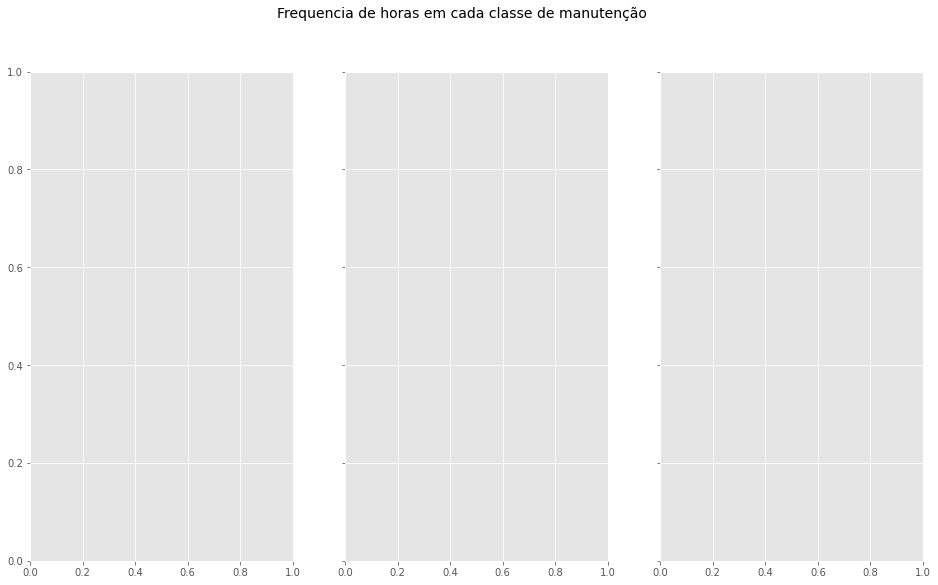

In [11]:
# estilo dos gráficos, ggplot é uma biblioteca de graficos famosa no R
plt.style.use('ggplot')
# grid  com 3 colunas de graficos
fig, axes = plt.subplots(ncols=3, figsize=(16, 9), sharey=True)
fig.suptitle('Frequencia de horas em cada classe de manutenção', size=14)

Código do gráfico 1: Classes de manutenção agregadas

In [12]:
# grafico 1
data_g1 = df_dist_agrupado.groupby('horas_range').sum().reset_index()  # dados
g1 = sns.barplot(ax=axes[0], data=data_g1, x='horas_range', y='%freq')  # figura

for p in axes[0].patches:  # coloca o valor da coluna em cima dela
    axes[0].text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
            fontsize=12, color='black', ha='center', va='bottom')
# bot_ylim, top_ylim = plt.ylim()
# plt.ylim(bot_ylim, top_ylim*1.05)
axes[0].set_ylabel('Probabilidade (%)')
axes[0].set_xlabel('Horas de manutenção')
axes[0].set_title('Agregadas', fontdict={'fontsize': 12})

Text(0.5, 1.0, 'Agregadas')

Código do gráfico 2: Manutenções corretivas emergenciais

In [13]:
# grafico 2
data_g2 = df_dist_agrupado[df_dist_agrupado['desc_classe_manutencao'] == 'Corret. Emergencial'].groupby('horas_range').sum().reset_index()  # dados
g2 = sns.barplot(ax=axes[1], data=data_g2, x='horas_range', y='%freq_relativa')  # figura

for p in axes[1].patches:  # coloca o valor da coluna em cima dela
    axes[1].text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
            fontsize=12, color='black', ha='center', va='bottom')
# bot_ylim, top_ylim = plt.ylim()
# plt.ylim(bot_ylim, top_ylim*1.05)
axes[1].set_ylabel('Probabilidade (%)')
axes[1].set_xlabel('Horas de manutenção')
axes[1].set_title('Corretiva Emergencial', fontdict={'fontsize': 12})

Text(0.5, 1.0, 'Corretiva Emergencial')

Código do gráfico 3: Manutenções de apoio, preventivas por condição e por tempo

In [14]:
# grafico 3
data_g3 = df_dist_agrupado[df_dist_agrupado['desc_classe_manutencao'] == 'Preventivas'].groupby('horas_range').sum().reset_index()  # dados
g3 = sns.barplot(ax=axes[2], data=data_g3, x='horas_range', y='%freq_relativa')  # figura

for p in axes[2].patches:  # coloca o valor da coluna em cima dela
    axes[2].text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
            fontsize=12, color='black', ha='center', va='bottom')
# bot_ylim, top_ylim = plt.ylim()
# plt.ylim(bot_ylim, top_ylim*1.05)
axes[2].set_ylabel('Probabilidade (%)')
axes[2].set_xlabel('Horas de manutenção')
axes[2].set_title('Apoio, Preventiva Condição e\nPreventiva por Tempo', fontdict={'fontsize': 12})

Text(0.5, 1.0, 'Apoio, Preventiva Condição e\nPreventiva por Tempo')

Os gráficos

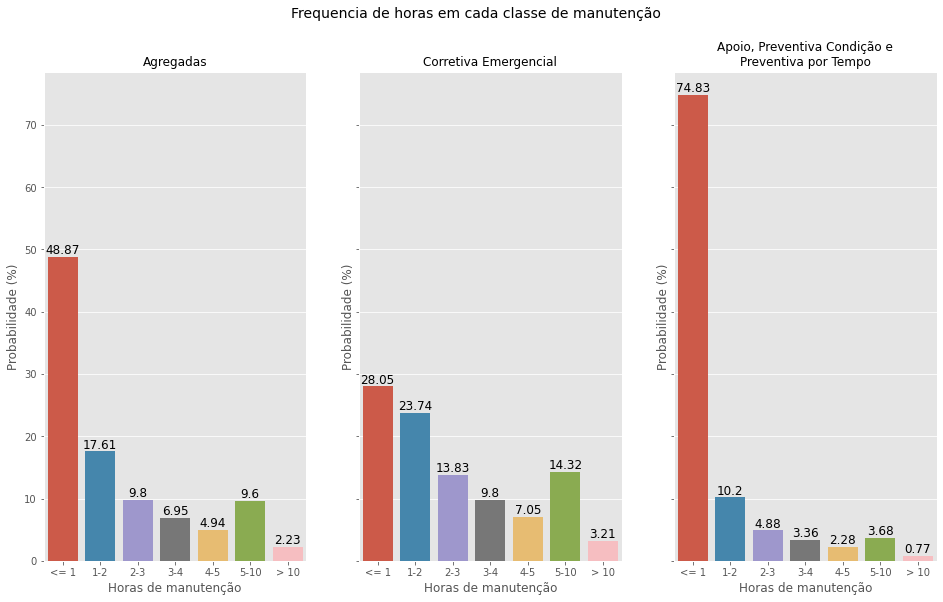

In [15]:
fig

"pode-se concluir que as manutenções preventivas levam, em media, consideravemente menos tempo para serem executadas,  reduzindo nao só o custo financeiro associado as horas de trabalho, mas também o custo relacionado a inevitavel parada da produção devido a uma manutenção emergencial"

##### Análise das manutenções  com uma perspectiva voltada aos colaboradores

In [16]:
df_colaboradores = df_raw.groupby(['cod_funcionario'])['horas'].agg([
    sum,
    'count',
    std,
    mean,
    var
])
df_colaboradores.sort_values('var', ascending=False)

,sum,count,std,mean,var
cod_funcionario,,,,,
107918,1760.96,12,108.165417,146.746667,11699.757461
104819,1541.94,8,77.023122,192.742500,5932.561336
33546,1330.82,54,69.711968,24.644815,4859.758497
41598,1579.20,83,61.371067,19.026506,3766.407855
48392,1330.35,93,54.307183,14.304839,2949.270143
...,...,...,...,...,...
109620,0.50,1,NaN,0.500000,NaN
109622,0.27,1,NaN,0.270000,NaN
109624,0.33,1,NaN,0.330000,NaN


In [17]:
df_colaboradores.describe()

,sum,count,std,mean,var
count,264.000000,264.000000,252.000000,264.000000,252.000000
mean,537.932614,193.420455,5.889803,6.609859,212.078411
std,529.642442,248.866207,13.345238,27.453970,979.149321
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.117500,10.000000,0.238135,0.549728,0.056710
50%,461.445000,130.000000,1.650659,1.899630,2.724762
75%,1014.510000,304.000000,3.782776,3.787097,14.309622
max,1760.960000,2342.000000,108.165417,219.980000,11699.757461


Distribuição de frequencia de manuteções agrupadas por colaborador

In [18]:
colaboradores_distribuicao = pd.cut(df_colaboradores['count'], [0, 10, 50, 100, 200, 500, inf],
                                    labels=['<= 10', '10-50', '50-100', '100-200', '200-500', '> 500'])
df_colaboradores['range_count'] = colaboradores_distribuicao

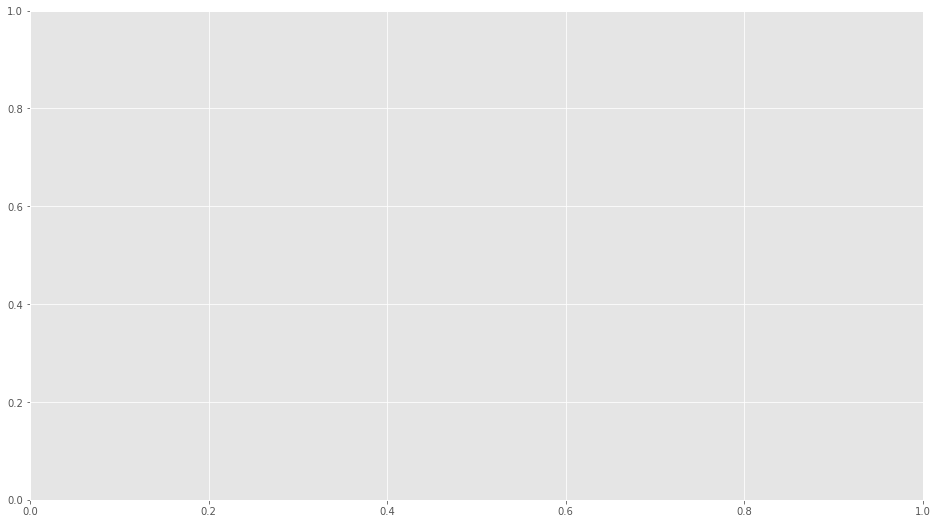

In [19]:
fig2, ax2 = plt.subplots(figsize=(16, 9))
# fig.suptitle()

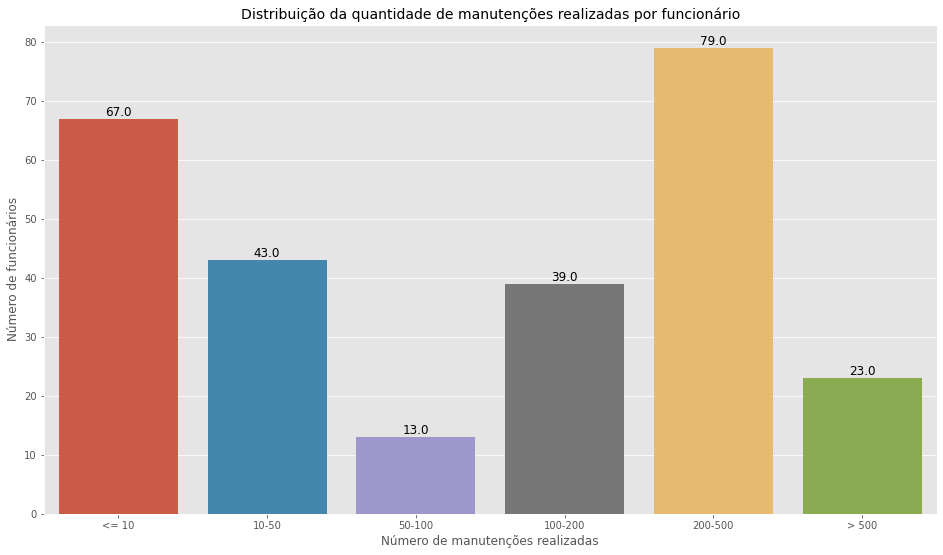

In [20]:
data_gc1 = df_colaboradores.reset_index().groupby('range_count').count().reset_index()  # dados
gc1 = sns.barplot(ax=ax2, data=data_gc1, x='range_count', y='cod_funcionario')  # figura

for p in ax2.patches:  # coloca o valor da coluna em cima dela
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), f'{round(p.get_height(), 2)}',
             fontsize=12, color='black', ha='center', va='bottom')

ax2.set_title('Distribuição da quantidade de manutenções realizadas por funcionário', size=14)
ax2.set_ylabel('Número de funcionários')
ax2.set_xlabel('Número de manutenções realizadas')
fig2

Há uma boa distribuição dos colaboradores quanto a quantidade de manutenções realizadas, com 102 deles tendo efetuado mais de 102, significando um bom contingente de colaboradores experientes (cerca de 38%).
Contudo, o número de colaboradores com menos de 50 manutenções realizadas também é grande, 110, indicando que cerca de 41% possuem pouca experiencia.

Colaboradores mais <b>consistentes<b>

In [21]:
df_colaboradores.sort_values('var', ascending=True).head()

,sum,count,std,mean,var,range_count
cod_funcionario,,,,,,
110222,439.96,2,0.000000,219.980000,0.000000,<= 10
102224,0.68,4,0.000000,0.170000,0.000000,<= 10
53776,0.11,2,0.007071,0.055000,0.000050,<= 10
51593,1759.79,8,0.030677,219.973750,0.000941,<= 10
110223,659.86,3,0.046188,219.953333,0.002133,<= 10


110222, 102224, 53776, 51593, 110223 possuem a menor variância entre todos os colaboradores, indicando maior consistencia no tempo de manutenção. Contudo, a quantidade de manutenções realizadas por eles <b> está abaixo da média (193)</b>, indicando uma possível distorção na medida.

In [22]:
# fazer scatter plot com x=qtd manutenção, y=variancia
# melhor = canto direito inferior
# pior = canto direito superior

##### Análise dos dias empregados para determinada manutenção

In [23]:
# correlação entre horas de serviço e dias de serviço

In [24]:
df_datas = df_raw[['desc_classe_manutencao', 'desc_sistema', 'desc_subsistema', 'horas']]
df_datas['data_entrada'] = pd.to_datetime(df_raw['data_entrada'], format='%d/%m/%Y') 
df_datas['data_saida'] = pd.to_datetime(df_raw['data_saida'], format='%d/%m/%Y')
df_datas['dias_manutencao'] = (df_datas['data_saida'] - df_datas['data_entrada']).dt.days

Correlação entre horas de manutenção e dias entre a entrada e a saída do sistema

In [25]:
data_gsCorr = df_datas.groupby(['desc_sistema'])[['horas', 'dias_manutencao']].mean().reset_index()

In [26]:
# plot a variacia ou std entre membros da mesma classe em volta

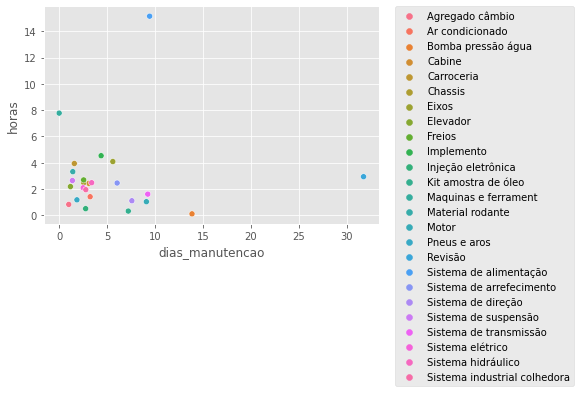

In [27]:
gsCorr = sns.scatterplot(data=data_gsCorr, x='dias_manutencao', y='horas', hue='desc_sistema')
# remover legenda? nao ta servindo pra muita coisa
# talvez categorizar em grupos maiores: sistema de direcao, motor, etc
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    Os pontos na parte inferior do gráfico e mais próximos da direita, indicam sistemas que, em média, levam poucas horas de serviços para manutenção, porém ficam muitos dias parados. O motivo é desconhecido pelo grupo, pois nao temos dados suficientes para responder tal questão. Alguns palpites incluem: falta de peças, falta de equipamento adequado (ou ocupação do equipamento) e falta de mão de obra qualificada para aquele serviço.